In [1]:
import pandas as  pd
import numpy  as  np
import matplotlib.pyplot  as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm_api
from sklearn import preprocessing

In [2]:
df  = pd.read_csv(r'/home/silva/Downloads/lista_empregados2.csv')
print(df.columns)

Index(['COD_EMPRESA', 'COD_EMPREGADO', 'NOME_EMPREGADO', 'APELIDO_EMPREGADO',
       'DATA_ADMISSAO', 'DATA_ANUENIO', 'DATA_ESPECIAL_ANUENIO',
       'DATA_NASCIMENTO', 'CPF_EMPREGADO', 'EST_CIVIL', 'SEXO',
       'GRAU_INSTRUCAO', 'POUP_FB', 'FATOR_JOIA', 'DEP_SAL_FAM', 'DEP_IR',
       'DEP_CRECHE_BABA', 'CONTR_INSS_TETO', 'AGE_CREDITO', 'CONTA_CORRENTE',
       'OP_FUNDACAO', 'OP_IR', 'OP_INSS', 'OP_GRATIFICACAO',
       'COD_VALE_REFEICAO', 'OP_MENS_SIND', 'OP_CLUBE_ESPORTIVO', 'OP_ASBERGS',
       'JOIA_FB', 'SUSP_FOLHA', 'HORA_CONT', 'COD_AFAST', 'DATA_INI_AFAST',
       'DATA_FIM_AFAST', 'COD_HORARIO', 'COD_INTERVALO', 'COD_QPADRAO',
       'DATA_INI_PADRAO', 'COD_FUNCAO', 'NIVEL_FUNCAO', 'DATA_INI_FUNCAO',
       'COD_AGENCIA', 'COD_DEPTO', 'COD_DIV', 'COD_SETOR', 'COD_AREA',
       'TURNO_CCUSTO', 'SIT_CCUSTO', 'DATA_INI_CCUSTO',
       'COD_EMPRESA_LOCAL_TRAB', 'COD_AGE_LTRAB', 'COD_DEPTO_LTRAB',
       'COD_DIV_LTRAB', 'COD_SETOR_LTRAB', 'COD_AREA_LTRAB',
       'TIPO_TURNO_

In [3]:
df_perfil = df
df_perfil['COD_EMPREGADO'] = df['COD_EMPREGADO'].apply(str)
df_perfil['COD_EMPREGADO'] = 'B' + df_perfil['COD_EMPREGADO']

In [4]:
df_perfil.COD_FUNCAO.value_counts()

11     282
0       61
320      3
Name: COD_FUNCAO, dtype: int64

In [5]:
df_perfil = df_perfil[['COD_EMPREGADO', 'DATA_ADMISSAO', 'DATA_NASCIMENTO', 'NIVEL_FUNCAO', 'EST_CIVIL', 'SEXO', 'DEP_CRECHE_BABA']]

In [6]:
df_perfil.head()

,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA
0,B40299,6/23/2014,5/29/1958,H0,2,M,0
1,B30062,5/14/1990,4/2/1970,C0,2,M,0
2,B32806,8/21/2003,12/2/1975,F0,2,M,0
3,B36603,7/2/2011,5/5/1987,H0,1,M,0
4,B36571,7/2/2011,12/30/1975,H0,7,M,0


In [7]:
df_perfil[df_perfil['COD_EMPREGADO'] == 'B36635']

,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA
254,B36635,7/2/2011,5/8/1985,F0,2,M,1


In [8]:
df_perfil.dtypes

COD_EMPREGADO      object
DATA_ADMISSAO      object
DATA_NASCIMENTO    object
NIVEL_FUNCAO       object
EST_CIVIL           int64
SEXO               object
DEP_CRECHE_BABA     int64
dtype: object

In [9]:
df_perfil['DATA_NASCIMENTO'] = df_perfil['DATA_NASCIMENTO'].apply(pd.to_datetime)
df_perfil['DATA_ADMISSAO'] = df_perfil['DATA_ADMISSAO'].apply(pd.to_datetime)

/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
df_perfil.sort_values('DATA_NASCIMENTO', ascending=False).head()

,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA
159,B41341,2018-12-17,1997-06-08,0,1,M,0
193,B41367,2018-12-17,1995-12-30,0,1,M,0
270,B41372,2018-12-24,1995-07-16,0,1,M,0
345,B41315,2018-07-30,1995-01-18,0,1,F,0
273,B41343,2018-12-17,1994-06-09,0,1,M,0


In [11]:
df_perfil.sort_values('DATA_ADMISSAO', ascending=False).head()

,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA
344,B41371,2018-12-24,1993-02-04,0,1,M,0
270,B41372,2018-12-24,1995-07-16,0,1,M,0
234,B41350,2018-12-17,1983-01-05,0,1,M,0
159,B41341,2018-12-17,1997-06-08,0,1,M,0
273,B41343,2018-12-17,1994-06-09,0,1,M,0


In [12]:
ano_hoje = pd.datetime.today().year
df_perfil['TEMPO_EMPRESA'] = ano_hoje -  df_perfil['DATA_ADMISSAO'].dt.year 
df_perfil['IDADE'] = ano_hoje - df_perfil['DATA_NASCIMENTO'].dt.year

/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_perfil['COD_USUARIO'] = df_perfil['COD_EMPREGADO']

/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_perfil.head()

,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA,TEMPO_EMPRESA,IDADE,COD_USUARIO
0,B40299,2014-06-23,1958-05-29,H0,2,M,0,5,61,B40299
1,B30062,1990-05-14,1970-04-02,C0,2,M,0,29,49,B30062
2,B32806,2003-08-21,1975-12-02,F0,2,M,0,16,44,B32806
3,B36603,2011-07-02,1987-05-05,H0,1,M,0,8,32,B36603
4,B36571,2011-07-02,1975-12-30,H0,7,M,0,8,44,B36571


In [15]:
def cria_classe(valor, media, classe_abaixo, classe_acima):
    if valor > media:
        return classe_acima
    return classe_abaixo

def plot_boxplot(df_class, df_features_standardized, w, h, classe):
    df_standardized = pd.concat([df_class,df_features_standardized],axis=1)
    df_melted = pd.melt(df_standardized,
                    id_vars=classe,
                    var_name="features",
                    value_name='value')
    plt.figure(figsize=(w,h))
    sns.boxplot(x="features", y="value", hue=classe, data=df_melted)

## Leitura do Dataset de cobertura de código

In [16]:
df_cobertura = pd.read_csv(r'/home/silva/Downloads/tcc/cobertura_individual.csv')
df_cobertura.head()

,CSS,NOME_CLASSE,LINHAS_COBERTAS,LINHAS_NAO_COBERTAS,COD_USUARIO,ULT_ATUALIZACAO
0,Bkr,Bergs.Bkr.Bkrssvxn.LegadoServico,30,17,B36631,11/27/2018 11:34:39
1,bjm,bergs.bjm.s08.fechamentoagencias.rn.Bjms08jm_Rn,24,49,B40124,11/27/2018 13:46:29
2,Bkr,Bergs.Bkr.Bkrssvxn.Serializadora,10,60,B36631,11/26/2018 16:25:36
3,Bkr,Bergs.Bkr.Bkrsemxn.EnviaEmail,424,81,B35493,11/26/2018 17:43:38
4,Bkr,Bergs.Bkr.Bkrssvxn.Util,24,27,B36631,11/26/2018 16:25:37


In [17]:
df_cobertura['CSS'] = df_cobertura['CSS'].str.upper()
df_cobertura['NOME_CLASSE'] = df_cobertura['NOME_CLASSE'].str.upper()
df_cobertura['DATA'] = df_cobertura['ULT_ATUALIZACAO'].apply(pd.to_datetime)

## Remover componentes que não são projetos da empresa

In [18]:
df_cobertura[~df_cobertura['CSS'].str.startswith('B')]['CSS'].value_counts()

PWX    161
POS     90
PXC     85
PWK     53
PHA     38
PZP     21
PZO     16
PZB     12
PWO     10
PNS      8
LEE      4
Name: CSS, dtype: int64

In [19]:
df_cobertura = df_cobertura[~df_cobertura['CSS'].str.startswith('PXC')]

## Seleciona a ultima cobertura do arquivo / classe

In [20]:
#Seleciona ultima cobertura da classe
df_cobertura_ajustada = df_cobertura.sort_values('DATA').groupby(['NOME_CLASSE', 'COD_USUARIO']).tail(1)

#cria percentual coberto
df_cobertura_ajustada['PORCENTAGEM_COBERTA'] = 100 * df_cobertura_ajustada['LINHAS_COBERTAS'] / (df_cobertura_ajustada['LINHAS_NAO_COBERTAS'] + df_cobertura_ajustada['LINHAS_COBERTAS'])


## Realiza merge com Dataset de usuários

In [21]:
df_final = pd.merge(df_cobertura_ajustada, df_perfil, on='COD_USUARIO', how='inner')
df_final.head(2)

,CSS,NOME_CLASSE,LINHAS_COBERTAS,LINHAS_NAO_COBERTAS,COD_USUARIO,ULT_ATUALIZACAO,DATA,PORCENTAGEM_COBERTA,COD_EMPREGADO,DATA_ADMISSAO,DATA_NASCIMENTO,NIVEL_FUNCAO,EST_CIVIL,SEXO,DEP_CRECHE_BABA,TEMPO_EMPRESA,IDADE
0,BJL,BERGS.BJL.BJLSNJXN.BRCT40L01,16,10,B35458,1/8/2018 13:23:04,2018-01-08 13:23:04,61.538462,B35458,2009-10-19,1978-12-25,F0,2,M,1,10,41
1,BJL,BERGS.BJL.BJLSNJXN.BRCT04L01,16,10,B35458,1/8/2018 13:23:04,2018-01-08 13:23:04,61.538462,B35458,2009-10-19,1978-12-25,F0,2,M,1,10,41


# Verificações

## Verifica distribuição de cobertura

Text(0.5, 0.98, 'Porcentagem de teste')

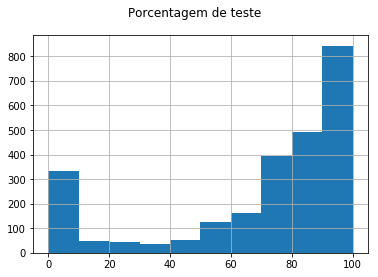

In [127]:
df_final['PORCENTAGEM_COBERTA'].hist()
plt.suptitle("Porcentagem de teste")

### Remove coberturas abaixo de 20%, pois de modo geral são classes apenas o construtor foi executado.

In [131]:
df_filtrada = df_final[df_final['PORCENTAGEM_COBERTA'] >= 20]

In [132]:
df_filtrada.columns

Index(['CSS', 'NOME_CLASSE', 'LINHAS_COBERTAS', 'LINHAS_NAO_COBERTAS',
       'COD_USUARIO', 'ULT_ATUALIZACAO', 'DATA', 'PORCENTAGEM_COBERTA',
       'COD_EMPREGADO', 'DATA_ADMISSAO', 'DATA_NASCIMENTO', 'NIVEL_FUNCAO',
       'EST_CIVIL', 'SEXO', 'DEP_CRECHE_BABA', 'TEMPO_EMPRESA', 'IDADE'],
      dtype='object')

In [148]:
df_filtrada.corr()

,LINHAS_COBERTAS,LINHAS_NAO_COBERTAS,PORCENTAGEM_COBERTA,EST_CIVIL,DEP_CRECHE_BABA,TEMPO_EMPRESA,IDADE
LINHAS_COBERTAS,1.000000,0.557727,-0.039781,0.056700,-0.016716,-0.031694,0.043235
LINHAS_NAO_COBERTAS,0.557727,1.000000,-0.432429,0.073998,0.038038,-0.010343,0.107561
PORCENTAGEM_COBERTA,-0.039781,-0.432429,1.000000,-0.031143,-0.074941,-0.086071,-0.165601
EST_CIVIL,0.056700,0.073998,-0.031143,1.000000,0.165199,0.128330,0.346221
DEP_CRECHE_BABA,-0.016716,0.038038,-0.074941,0.165199,1.000000,0.037035,0.340646
TEMPO_EMPRESA,-0.031694,-0.010343,-0.086071,0.128330,0.037035,1.000000,0.278653
IDADE,0.043235,0.107561,-0.165601,0.346221,0.340646,0.278653,1.000000


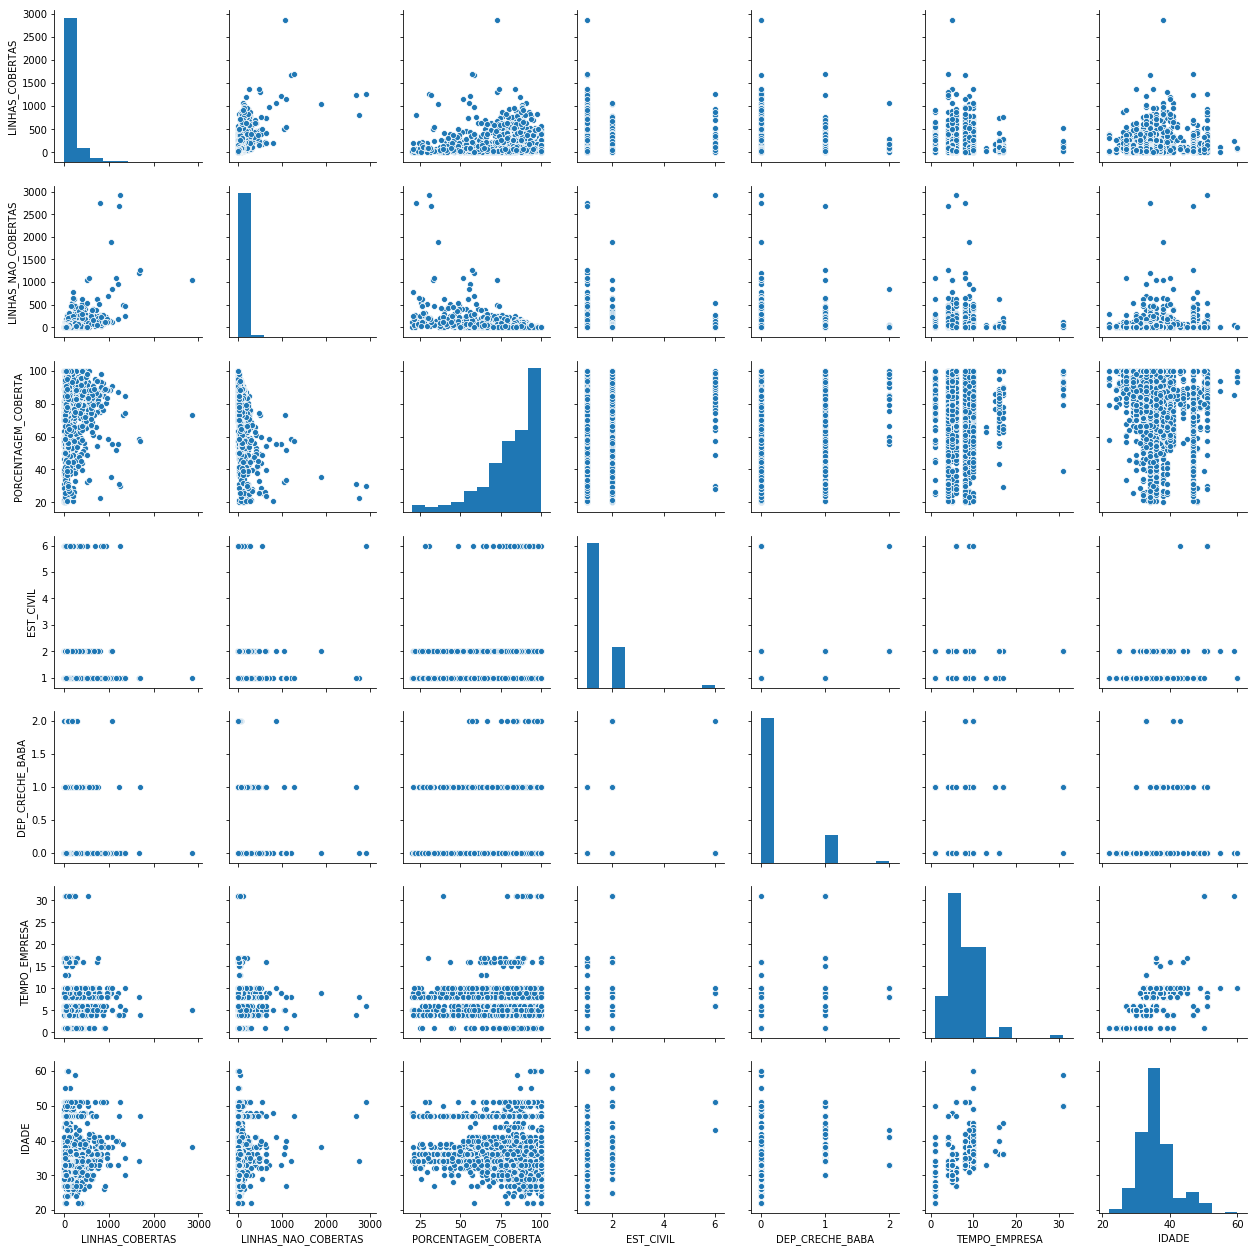

In [149]:
sns.pairplot(df_filtrada)

mediana: 85.18518518518519
count    2534.000000
mean       69.797164
std        32.804781
min         0.000000
25%        58.887561
50%        81.496476
75%        94.444444
max       100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64


Text(0.5, 0.98, 'Porcentagem de teste')

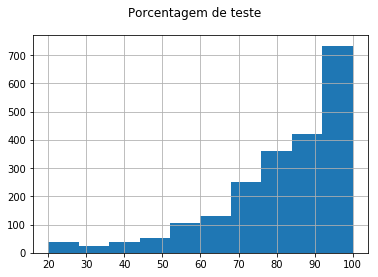

In [129]:
print("mediana: " + str(df_filtrada['PORCENTAGEM_COBERTA'].median()))
print(df_final['PORCENTAGEM_COBERTA'].describe())
df_filtrada['PORCENTAGEM_COBERTA'].hist()
plt.suptitle("Porcentagem de teste")

In [130]:
print("total de arquivos testados:" + str(len(df_filtrada)))

total de arquivos testados:2153


# Verificação de usuários

In [96]:
print("total de usuários únicos:" + str(len((df_filtrada['COD_USUARIO'].unique()))))

total de usuários únicos:158


### Alguns usuários posssuem mais coberturas gravadas que outros

In [97]:
df_filtrada['COD_USUARIO'].value_counts()

B40452    89
B40124    81
B36621    63
B40126    61
B35607    56
B40404    44
B35491    42
B35600    41
B35449    40
B35568    40
B35401    37
B35489    37
B40170    36
B40369    33
B35585    33
B35559    33
B41278    31
B41277    31
B40197    29
B40423    27
B41317    27
B35372    27
B40200    27
B35558    26
B35474    26
B35371    26
B40371    25
B41294    25
B40178    25
B41289    25
          ..
B35560     2
B40448     2
B41308     2
B35408     2
B36632     2
B40307     2
B35397     2
B35432     2
B33421     2
B35575     2
B35572     2
B32331     1
B40354     1
B35511     1
B36619     1
B36630     1
B40429     1
B35475     1
B35388     1
B35405     1
B40134     1
B41295     1
B35508     1
B36647     1
B36649     1
B31652     1
B35597     1
B40311     1
B40163     1
B41280     1
Name: COD_USUARIO, Length: 158, dtype: int64

#### São diversos desenvolvedores, mas muitos possuem apenas 1 ocorrência de Cobertura de código testado.


### Verificação de usuários únicos

Text(0.5, 0.98, 'Idade dos Desenvolvedores')

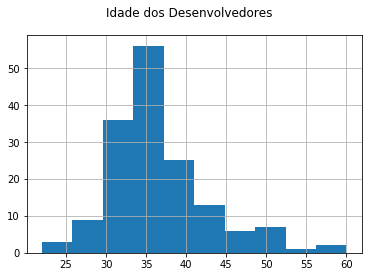

In [98]:
df_filtrada.groupby('COD_USUARIO').tail(1)['IDADE'].hist()
plt.suptitle("Idade dos Desenvolvedores")

In [30]:
usuarios = df_filtrada.groupby('COD_USUARIO').tail(1)
print("mediana: " + str(usuarios['IDADE'].median()))
usuarios['IDADE'].describe()

mediana: 36.0


count    158.000000
mean      36.487342
std        6.202257
min       22.000000
25%       33.000000
50%       36.000000
75%       39.000000
max       60.000000
Name: IDADE, dtype: float64

count    158.000000
mean       7.626582
std        4.326609
min        1.000000
25%        5.000000
50%        8.000000
75%       10.000000
max       31.000000
Name: TEMPO_EMPRESA, dtype: float64

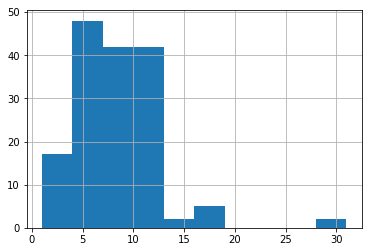

In [31]:
usuarios['TEMPO_EMPRESA'].hist()
usuarios['TEMPO_EMPRESA'].describe()

### Verificação dos registros de cobertura de código de teste
#### Qual a distribuição de idade dos desenvolvedores que gravaram registros

Text(0.5, 0.98, 'Idade dos Desenvolvedores nas amostras')

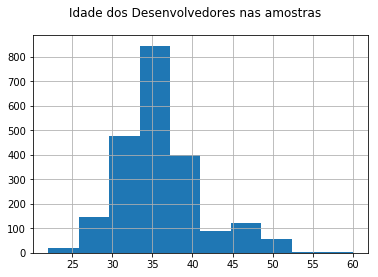

In [33]:
df_filtrada['IDADE'].hist()
plt.suptitle("Idade dos Desenvolvedores nas amostras")

In [34]:
print("mediana:" + str(df_cobertura_ajustada['IDADE'].median()))
df_cobertura_ajustada['IDADE'].describe()

mediana:36.0


count    2153.000000
mean       35.995820
std         5.268399
min        22.000000
25%        33.000000
50%        36.000000
75%        39.000000
max        60.000000
Name: IDADE, dtype: float64

### Distribuição da tempo de empresa em relação aos registros
#### Qual a distribuição de tempo de empresa, dos registros gravados de percentual de cobertura 

Text(0.5, 0.98, 'Tempo de empresa relativo aos registros gravados')

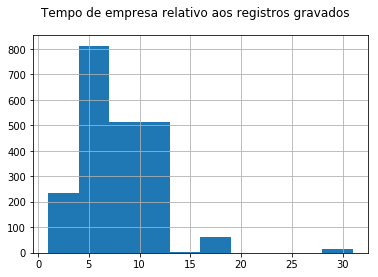

In [35]:
df_filtrada['TEMPO_EMPRESA'].hist()
plt.suptitle("Tempo de empresa relativo aos registros gravados")

## Cobertura ~ faixa etária

In [36]:
def cria_classe_idade(x):
    if x < 30:
        return '20 anos'
    elif x >= 30 and x <= 40:
        return '30 anos'
    elif x > 40:
        return 'acima 40 anos'

In [99]:
classe = 'FAIXA ETARIA'
df_filtrada[classe] = df_filtrada.apply(lambda x: cria_classe_idade(x['IDADE']), axis=1)
df_filtrada = df_filtrada.sort_values(by=classe, ascending=True)

/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
df_filtrada.to_csv(r'/home/silva/desenvolvedor/export_dataframe.csv', index = None, header=True)

30 anos          1718
acima 40 anos     270
20 anos           165
Name: FAIXA ETARIA, dtype: int64


Text(0.5, 0.98, 'Faixa etária desenvolvedor que gerou ocorrência')

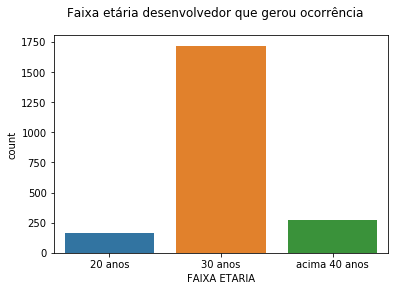

In [100]:
print(df_filtrada[classe].value_counts())
sns.countplot(df_filtrada[classe],label="Count")
plt.suptitle("Faixa etária desenvolvedor que gerou ocorrência")

In [42]:
df_20 = df_filtrada[df_filtrada[classe] == '20 anos']
df_30 = df_filtrada[df_filtrada[classe] == '30 anos']
df_40 = df_filtrada[df_filtrada[classe] == 'acima 40 anos']

### Teste de normalidade para as distribuições

In [43]:
print(stats.normaltest(df_20['PORCENTAGEM_COBERTA']))
print(stats.normaltest(df_30['PORCENTAGEM_COBERTA']))
print(stats.normaltest(df_40['PORCENTAGEM_COBERTA']))

NormaltestResult(statistic=77.44614172236157, pvalue=1.5232949511180678e-17)
NormaltestResult(statistic=315.673067465821, pvalue=2.834421000457827e-69)
NormaltestResult(statistic=26.11512967745273, pvalue=2.133888109542149e-06)


In [102]:
df_filtrada[classe].value_counts()

30 anos          1718
acima 40 anos     270
20 anos           165
Name: FAIXA ETARIA, dtype: int64

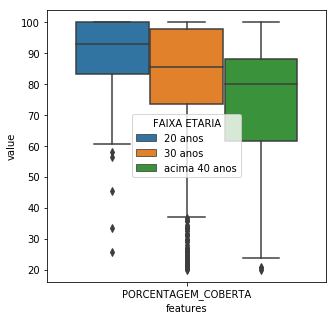

In [103]:
plot_boxplot(df_filtrada[classe], df_filtrada['PORCENTAGEM_COBERTA'], 5, 5, classe)

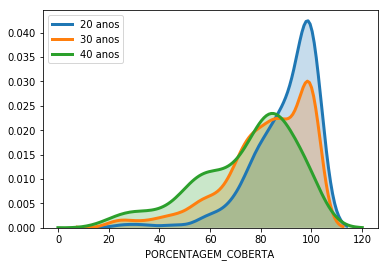

In [104]:
x1 = df_filtrada[df_filtrada[classe] == '20 anos']['PORCENTAGEM_COBERTA']
x2 = df_filtrada[df_filtrada[classe] == '30 anos']['PORCENTAGEM_COBERTA']
x3 = df_filtrada[df_filtrada[classe] == 'acima 40 anos']['PORCENTAGEM_COBERTA']

sns.distplot(x1, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = '20 anos')
sns.distplot(x2, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = '30 anos')
sns.distplot(x3, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = '40 anos')

In [52]:
print('median:' + str(x1.median()))
print(x1.describe())
print('----------------------')
print('median:' + str(x2.median()))
print(x2.describe())
print('----------------------')
print('median:' + str(x3.median()))
print(x3.describe())


median:93.02325581395348
count    165.000000
mean      89.519182
std       12.990635
min       25.523013
25%       83.467742
50%       93.023256
75%      100.000000
max      100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64
----------------------
median:85.41666666666667
count    1718.000000
mean       82.151822
std        17.388145
min        20.000000
25%        73.460478
50%        85.416667
75%        97.843619
max       100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64
----------------------
median:79.95215311004785
count    270.000000
mean      74.382382
std       19.376799
min       20.000000
25%       61.538462
50%       79.952153
75%       88.326766
max      100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64


### Kruskal caso não seja distribuição não-paramétrica

In [53]:
print(stats.kruskal(x1, x2))
print(stats.kruskal(x1, x3))
print(stats.kruskal(x2, x3))
print(stats.kruskal(x1, x2, x3))

KruskalResult(statistic=32.41167259623873, pvalue=1.2473497559800273e-08)
KruskalResult(statistic=82.69090004693703, pvalue=9.59419260693354e-20)
KruskalResult(statistic=44.934503326593415, pvalue=2.0373617519874524e-11)
KruskalResult(statistic=86.62254776097633, pvalue=1.5493614625366714e-19)


In [105]:
df_filtrada[classe] = df_filtrada[classe].astype('category')
df_filtrada['CLASSE'] = df_filtrada[classe].cat.codes

### Anova 

In [106]:
model = ols('PORCENTAGEM_COBERTA ~ CLASSE',data=df_filtrada).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     PORCENTAGEM_COBERTA   R-squared:                       0.037
Model:                             OLS   Adj. R-squared:                  0.037
Method:                  Least Squares   F-statistic:                     82.61
Date:                 Sat, 15 Jun 2019   Prob (F-statistic):           2.21e-19
Time:                         11:49:40   Log-Likelihood:                -9198.3
No. Observations:                 2153   AIC:                         1.840e+04
Df Residuals:                     2151   BIC:                         1.841e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.7207      0.954     94.028      0.000      87.849      91.592
CLASSE        -7.6076      0.837     -9.089      0.000      -9.249      -5.966
==============================================================================
Omnibus:                      378.701   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.395
Skew:                          -1.164   Prob(JB):                    4.28e-136
Kurtosis:                       4.235   Cond. No.                         4.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

              df         sum_sq       mean_sq          F        PR(>F)
CLASSE       1.0   24879.403102  24879.403102  82.608859  2.208296e-19
Residual  2151.0  647819.090135    301.171125        NaN           NaN


### Pode-se concluir que faixa etária é uma variável que influencia na cobertura de código

## Cobertura ~ Sexo

In [108]:
df_filtrada['SEXO'].value_counts()

M    2007
F     146
Name: SEXO, dtype: int64

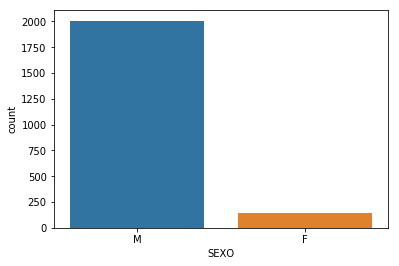

In [109]:
sns.countplot(df_filtrada['SEXO'],label="Count")

### Undersampling

In [110]:
#Splitting by class
df_b = df_filtrada[df_filtrada['SEXO'] == 'M']
df_m = df_filtrada[df_filtrada['SEXO'] == 'F']

In [111]:
print(stats.normaltest(df_b['PORCENTAGEM_COBERTA']))
print(stats.normaltest(df_m['PORCENTAGEM_COBERTA']))

NormaltestResult(statistic=345.52859583243094, pvalue=9.320060791151801e-76)
NormaltestResult(statistic=15.569697662138635, pvalue=0.00041599021023480985)


In [68]:
df_filtrada['SEXO'].value_counts()

M    2007
F     146
Name: SEXO, dtype: int64

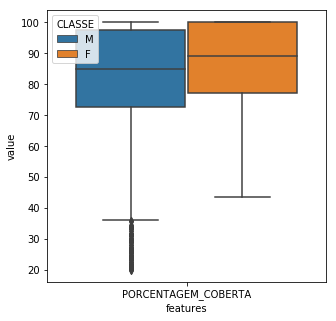

In [112]:
df_filtrada['CLASSE'] = df_filtrada['SEXO']
plot_boxplot(df_filtrada['CLASSE'], df_filtrada['PORCENTAGEM_COBERTA'], 5, 5, 'CLASSE')

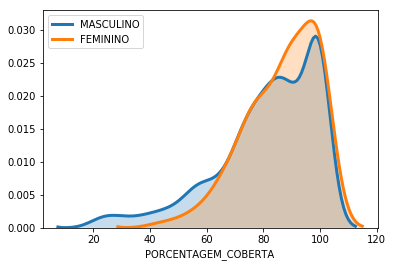

In [114]:
x1 = df_filtrada[df_filtrada['CLASSE'] == 'M']['PORCENTAGEM_COBERTA']
x2 = df_filtrada[df_filtrada['CLASSE'] == 'F']['PORCENTAGEM_COBERTA']

sns.distplot(x1, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = 'MASCULINO')
sns.distplot(x2, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = 'FEMININO')

In [73]:
print(x1.median())
print(x1.describe())
print("=========")
print(x2.median())
print(x2.describe())
print("=========")

84.88888888888889
count    2007.000000
mean       81.400066
std        17.944233
min        20.000000
25%        72.727273
50%        84.888889
75%        97.408195
max       100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64
89.0743537194837
count    146.000000
mean      86.443869
std       12.679923
min       43.564356
25%       77.012920
50%       89.074354
75%      100.000000
max      100.000000
Name: PORCENTAGEM_COBERTA, dtype: float64


### Kruskal

In [76]:
print(stats.kruskal(x1, x2))

KruskalResult(statistic=7.801164008766153, pvalue=0.00522125888251014)


### Anova

In [115]:
df_filtrada['CLASSE'] = df_filtrada.SEXO.astype('category')
df_filtrada['CLASSE'] = df_filtrada['CLASSE'].cat.codes
model = ols('PORCENTAGEM_COBERTA ~ CLASSE',data=df_filtrada).fit()
model.summary()
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

              df         sum_sq      mean_sq         F    PR(>F)
CLASSE       1.0    3462.361986  3462.361986  11.12842  0.000865
Residual  2151.0  669236.131251   311.127909       NaN       NaN


### Através dos testes, pode-se concluir que sexo é uma variável que influencia na quantidade de cobertura

## Cobertura ~ Estado civil 

/home/silva/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


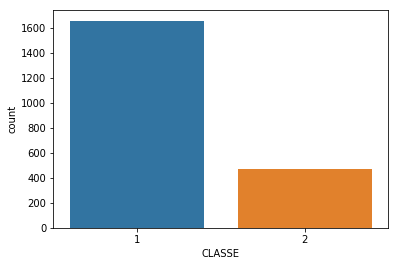

In [140]:
df_temp = df_filtrada[df_filtrada['EST_CIVIL'] != 6]
df_temp['CLASSE'] = df_temp['EST_CIVIL']
sns.countplot(df_temp['CLASSE'],label="Count")

In [141]:
df_temp['CLASSE'].value_counts()

1    1655
2     468
Name: CLASSE, dtype: int64

In [142]:
#Splitting by class
df_solteiro = df_temp[df_temp['CLASSE'] == 1]['PORCENTAGEM_COBERTA']
df_casado = df_temp[df_temp['CLASSE'] == 2]['PORCENTAGEM_COBERTA']

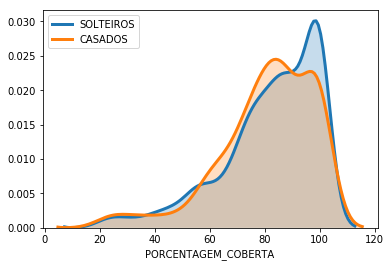

In [143]:
sns.distplot(df_solteiro, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = 'SOLTEIROS')
sns.distplot(df_casado, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3},  label = 'CASADOS')

### Teste de normalidade

In [144]:
print(stats.normaltest(df_solteiro))
print(stats.normaltest(df_casado))

NormaltestResult(statistic=294.3069336672622, pvalue=1.2361220720928626e-64)
NormaltestResult(statistic=89.87802345724239, pvalue=3.042532206189635e-20)


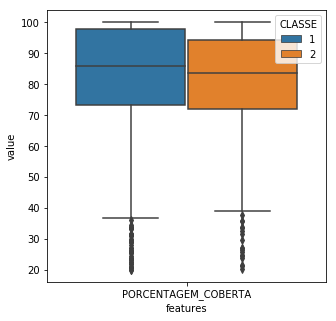

In [146]:
plot_boxplot(df_temp['CLASSE'], df_temp['PORCENTAGEM_COBERTA'], 5, 5, 'CLASSE')

### Anova

In [147]:
filtro = df_filtrada[df_filtrada['EST_CIVIL'] != 6]
model = ols('EST_CIVIL ~ PORCENTAGEM_COBERTA',data=filtro).fit()
aov_table = sm.stats.anova_lm(model, fit=2)
print(aov_table)

                         df      sum_sq   mean_sq         F    PR(>F)
PORCENTAGEM_COBERTA     1.0    0.425297  0.425297  2.475401  0.115789
Residual             2121.0  364.407487  0.171809       NaN       NaN
